C:\Users\ai'r\AppData\Local\Temp\ipykernel_21324\788207338.py:14: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


Shape: (59887, 19)
   cord_uid                                       sha source_x  \
0  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
1  ymceytj3  e3d0d482ebd9a8ba81c254cc433f314142e72174      PMC   
2  wzj2glte  00b1d99e70f779eb4ede50059db469c65e8c1469      PMC   
3  2sfqsfm1  cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0      PMC   
4  i0zym7iq  dde02f11923815e6a16a31dd6298c46b109c5dfa      PMC   

                                               title  \
0  Sequence requirements for RNA strand transfer ...   
1  Crystal structure of murine sCEACAM1a[1,4]: a ...   
2  Synthesis of a novel hepatitis C virus protein...   
3  Structure of coronavirus main proteinase revea...   
4  Discontinuous and non-discontinuous subgenomic...   

                        doi      pmcid   pubmed_id license  \
0  10.1093/emboj/20.24.7220  PMC125340  11742998.0     unk   
1   10.1093/emboj/21.9.2076  PMC125375  11980704.0     unk   
2  10.1093/emboj/20.14.3840  PMC125543  11447125.0   no-cc   

C:\Users\ai'r\AppData\Local\Temp\ipykernel_21324\788207338.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="Blues_d")


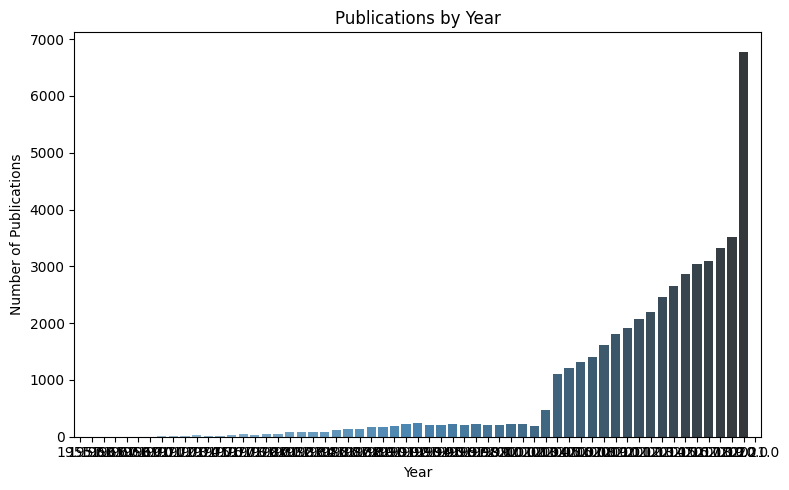

C:\Users\ai'r\AppData\Local\Temp\ipykernel_21324\788207338.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_journals.index, x=top_journals.values, palette="Greens_d")


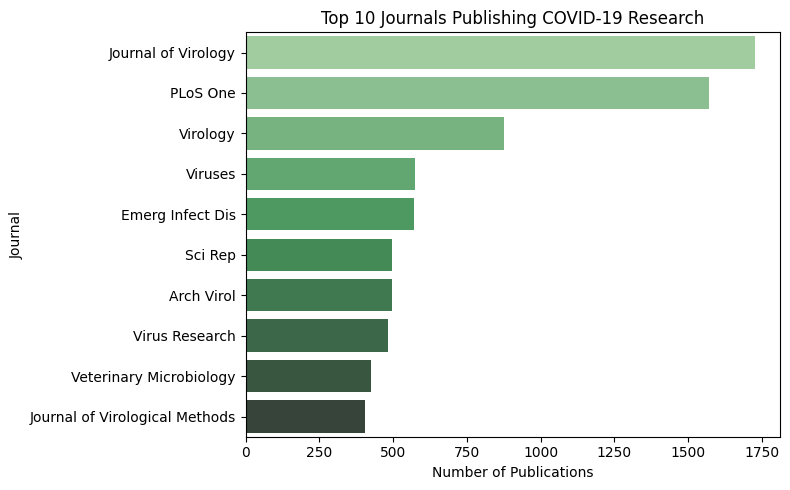

C:\Users\ai'r\AppData\Local\Temp\ipykernel_21324\788207338.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="Oranges_d")


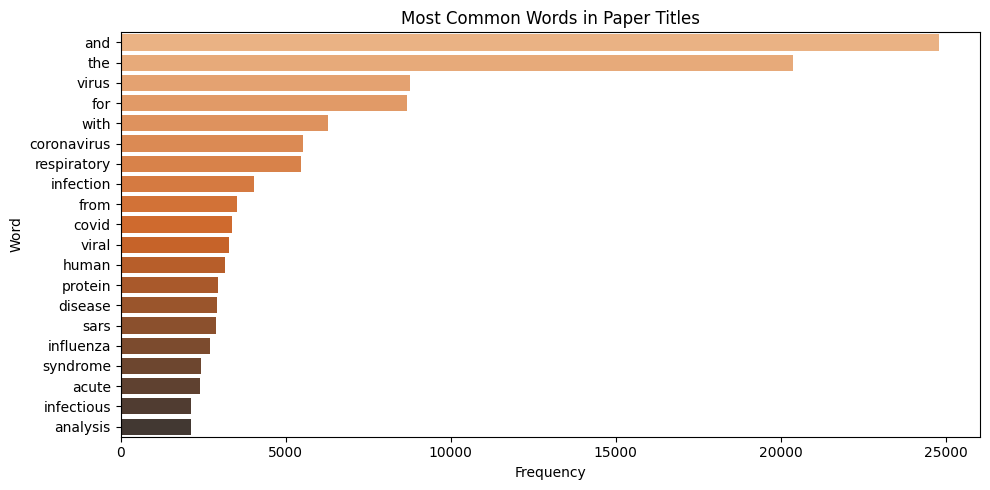

In [6]:
# Part 1: Data Loading and Basic Exploration 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import re

# Set the correct dataset path
BASE_DIR = r"C:\Users\ai'r\Desktop\PLP Academy\python\Week8\Frameworks_Assignment"
DATA_PATH = os.path.join(BASE_DIR, "data", "metadata.csv")

# Load dataset
df = pd.read_csv(DATA_PATH)

# Inspect data
print("Shape:", df.shape)
print(df.head())
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

# Part 2: Data Cleaning
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year
df['abstract_word_count'] = df['abstract'].astype(str).apply(lambda x: len(x.split()))

# Drop rows missing title or abstract
df_clean = df.dropna(subset=['title', 'abstract'])

# Part 3: Data Analysis & Visualizations

# Publications per year
year_counts = df_clean['year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="Blues_d")
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.tight_layout()
plt.show()

# Top Journals
top_journals = df_clean['journal'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y=top_journals.index, x=top_journals.values, palette="Greens_d")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Publications")
plt.ylabel("Journal")
plt.tight_layout()
plt.show()

# Word Frequency from Titles
titles = " ".join(df_clean['title'].dropna()).lower()
words = re.findall(r'\b[a-z]{3,}\b', titles)  # only words with >= 3 letters
common_words = Counter(words).most_common(20)

# Plot most common words
labels, values = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(values), y=list(labels), palette="Oranges_d")
plt.title("Most Common Words in Paper Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()
